In [164]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



## 1.Các phép biến đổi cường độ sáng (Intensity Transformation)

## 1.1 Negative Image (Ảnh âm)

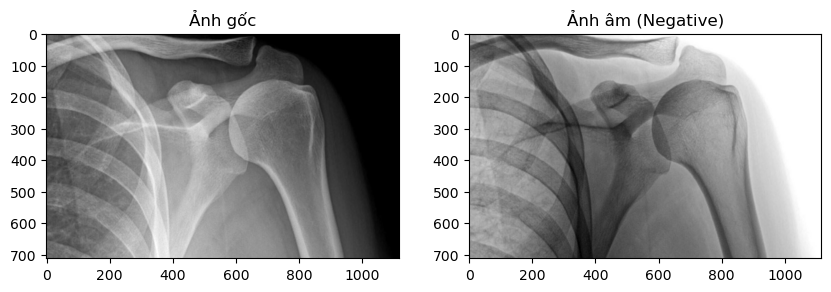

In [165]:
# Đọc ảnh
img1_1 = cv2.imread("D:\\IUH\\NAM_BA\\HK1\\XU_LY_ANH\\TieuLuan\\img\\x-quang.jpg")  

img1_1_rgb = cv2.cvtColor(img1_1, cv2.COLOR_BGR2RGB)

# Tạo ảnh âm
negative_img1_1 = 255 - img1_1

# Hiển thị
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img1_1_rgb), plt.title("Ảnh gốc")
plt.subplot(1,2,2), plt.imshow(negative_img1_1, cmap='gray'), plt.title("Ảnh âm (Negative)")
plt.show()


## 1.2 Log Transformation (Biến đổi log)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8780\2641917723.py:7: RuntimeWarning: divide by zero encountered in log
  log_img1_2 = c * (np.log(img1_2 + 1))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8780\2641917723.py:8: RuntimeWarning: invalid value encountered in cast
  log_img1_2 = np.array(log_img1_2, dtype=np.uint8)


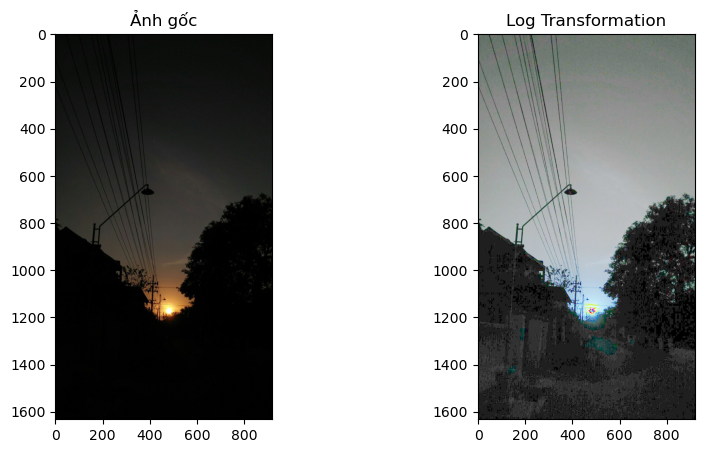

In [166]:


# Đọc ảnh
img1_2 = cv2.imread("D:\\IUH\\NAM_BA\\HK1\\XU_LY_ANH\\TieuLuan\\img\\vung-toi.jpg")
img1_2_rgb = cv2.cvtColor(img1_2, cv2.COLOR_BGR2RGB)

# Biến đổi log
c = 255 / np.log(1 + np.max(img1_2))
log_img1_2 = c * (np.log(img1_2 + 1))
log_img1_2 = np.array(log_img1_2, dtype=np.uint8)

# Hiển thị
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img1_2_rgb), plt.title("Ảnh gốc")
plt.subplot(1,2,2), plt.imshow(log_img1_2, cmap='gray'), plt.title("Log Transformation")
plt.show()




## 1.3 Power-law (Gamma Correction)

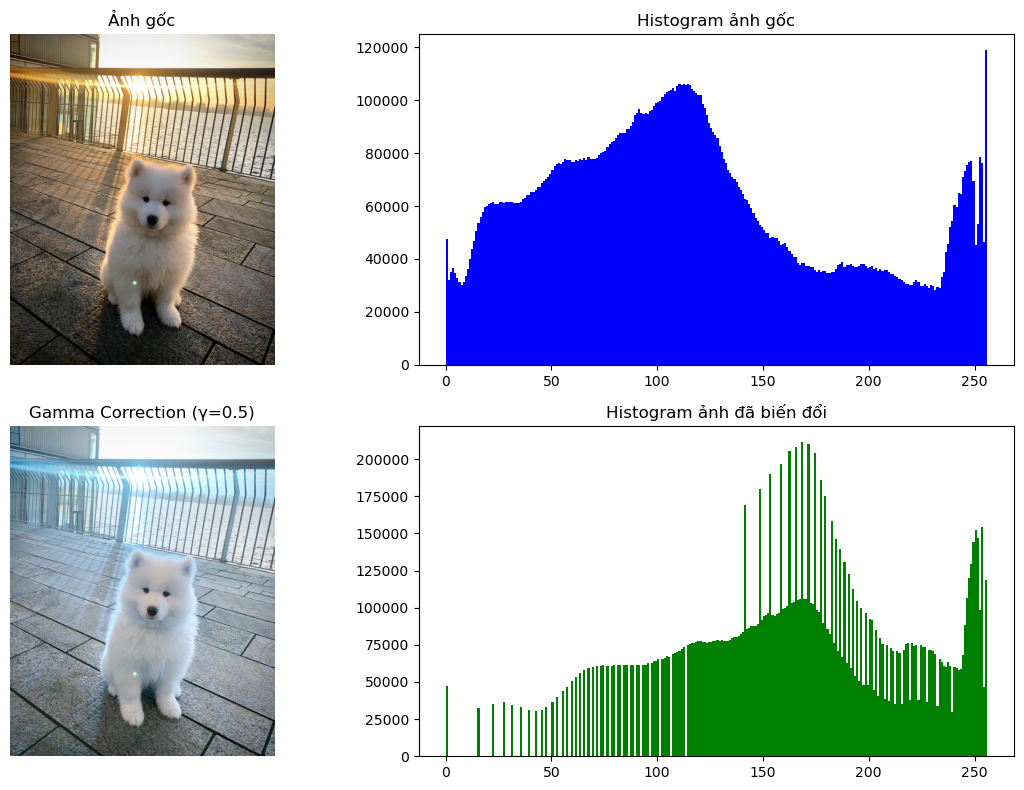

In [167]:
# Đọc ảnh
img1_3 = cv2.imread("D:\\IUH\\NAM_BA\\HK1\\XU_LY_ANH\\TieuLuan\\img\\anh-cun.jpg")
img1_3_rgb = cv2.cvtColor(img1_3, cv2.COLOR_BGR2RGB)


# Gamma Correction
gamma = 0.5   # <1 làm ảnh sáng hơn, >1 làm ảnh tối hơn
gamma_corrected = np.array(255*(img1_3 / 255) ** gamma, dtype='uint8')

# Hiển thị ảnh và histogram trên cùng một figure
plt.figure(figsize=(12,8))

# Ảnh gốc
plt.subplot(2,2,1)
plt.imshow(img1_3_rgb)
plt.title("Ảnh gốc")
plt.axis('off')

# Histogram ảnh gốc
plt.subplot(2,2,2)
plt.hist(img1_3.ravel(), 256, [0, 256], color='blue')
plt.title("Histogram ảnh gốc")

# Ảnh sau Gamma Correction
plt.subplot(2,2,3)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f"Gamma Correction (γ={gamma})")
plt.axis('off')

# Histogram ảnh đã biến đổi
plt.subplot(2,2,4)
plt.hist(gamma_corrected.ravel(), 256, [0, 256], color='green')
plt.title("Histogram ảnh đã biến đổi")

plt.tight_layout()
plt.show()

## 1.4 Piecewise-linear Transformation

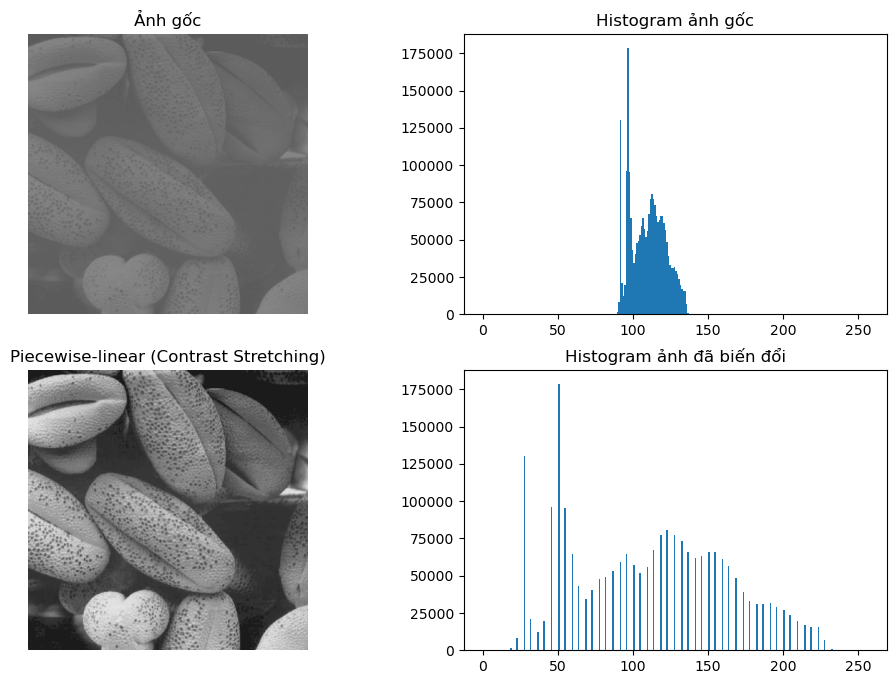

In [168]:
# Contrast Stretching
# Đọc ảnh
img1_4 = cv2.imread("D:\\IUH\\NAM_BA\\HK1\\XU_LY_ANH\\TieuLuan\\img\\cs.jpg")
# Chuyển ảnh sang RGB để hiển thị đúng màu
img1_4_rgb = cv2.cvtColor(img1_4, cv2.COLOR_BGR2RGB)

# Xác định min và max
r_min, r_max = np.min(img1_4), np.max(img1_4)

# Áp dụng Linear Stretching
stretched = ((img1_4 - r_min) / (r_max - r_min)) * 255
stretched = stretched.astype(np.uint8)

# Hiển thị
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(img1_4_rgb)
plt.title("Ảnh gốc")
plt.axis('off')
# biểu đồ histogram của ảnh gốc
plt.subplot(2,2,2)
plt.hist(img1_4.ravel(), 256, [0, 256])
plt.title("Histogram ảnh gốc")

plt.subplot(2,2,3)
plt.imshow(stretched, cmap='gray')
plt.title("Piecewise-linear (Contrast Stretching)")
plt.axis('off')
# biểu đồ histogram của ảnh đã biến đổi
plt.subplot(2,2,4)
plt.hist(stretched.ravel(), 256, [0, 256])
plt.title("Histogram ảnh đã biến đổi")
plt.show()

## 2.Cân bằng lược đồ mức xám (Histogram Equalization)

## 2.1 Cân bằng histogram toàn cục

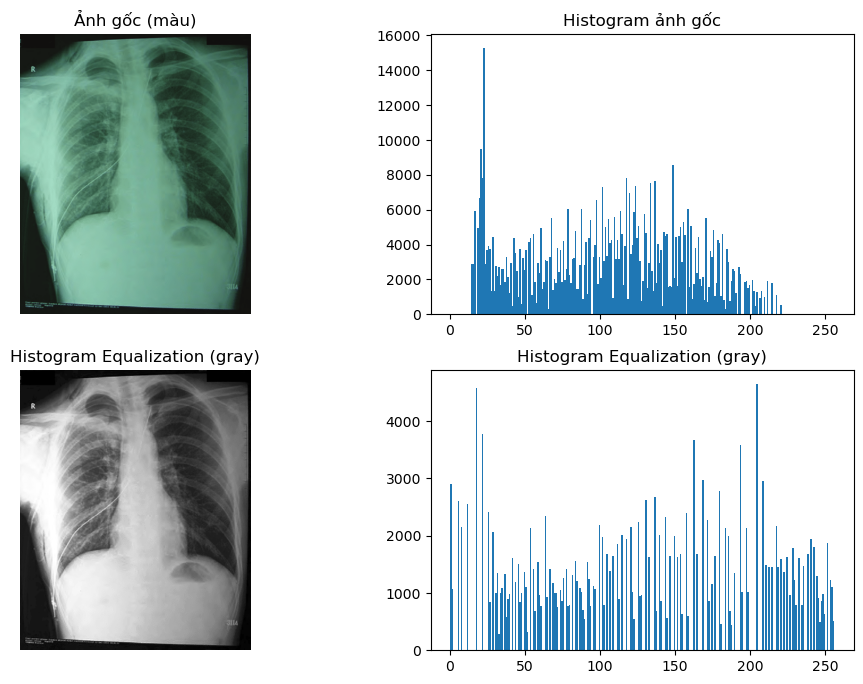

In [169]:
# Đọc ảnh màu
img2_1 = cv2.imread("D:\\IUH\\NAM_BA\\HK1\\XU_LY_ANH\\TieuLuan\\img\\anh-phoi.jpg")
img2_1_rgb = cv2.cvtColor(img2_1, cv2.COLOR_BGR2RGB)

# Chuyển sang ảnh xám để cân bằng histogram
img_gray = cv2.cvtColor(img2_1, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(img_gray)

# Hiển thị kết quả
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title("Ảnh gốc (màu)")
plt.imshow(img2_1_rgb)
plt.axis("off")

plt.subplot(2,2,2)
plt.hist(img2_1_rgb.ravel(), 256, [0, 256])
plt.title("Histogram ảnh gốc")

plt.subplot(2,2,3)
plt.title("Histogram Equalization (gray)")
plt.imshow(equalized_img, cmap="gray")
plt.axis("off")

plt.subplot(2,2,4)
plt.hist(equalized_img.ravel(), 256, [0, 256])
plt.title("Histogram Equalization (gray)")

plt.show()

## 2.2 Adaptive Histogram Equalization (CLAHE)

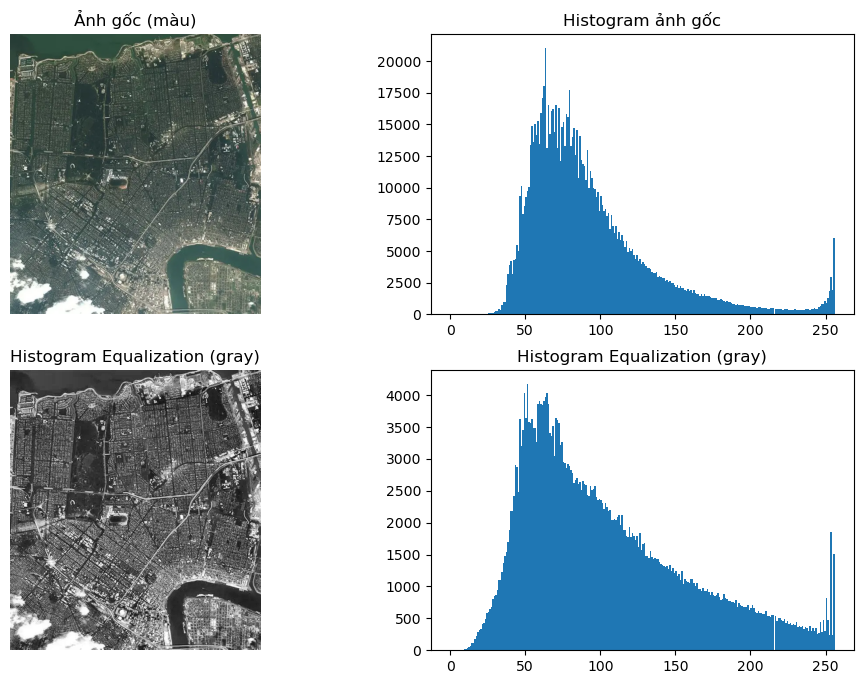

''

In [170]:
# Đọc ảnh màu
img2_2 = cv2.imread("D:\\IUH\\NAM_BA\\HK1\\XU_LY_ANH\\TieuLuan\\img\\anh-veTinh.jpg")
img2_2_rgb = cv2.cvtColor(img2_2, cv2.COLOR_BGR2RGB)

# Chuyển sang ảnh xám để cân bằng histogram
img_gray = cv2.cvtColor(img2_2, cv2.COLOR_BGR2GRAY)
# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img_gray)

# Hiển thị kết quả
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title("Ảnh gốc (màu)")
plt.imshow(img2_2_rgb)
plt.axis("off")

plt.subplot(2,2,2)
plt.hist(img2_2_rgb.ravel(), 256, [0, 256])
plt.title("Histogram ảnh gốc")

plt.subplot(2,2,3)
plt.title("Histogram Equalization (gray)")
plt.imshow(clahe_img, cmap="gray")
plt.axis("off")

plt.subplot(2,2,4)
plt.hist(clahe_img.ravel(), 256, [0, 256])
plt.title("Histogram Equalization (gray)")

plt.show()
_

## 2.3 Viết hàm cân bằng histogram thủ công (không dùng hàm có sẵn)

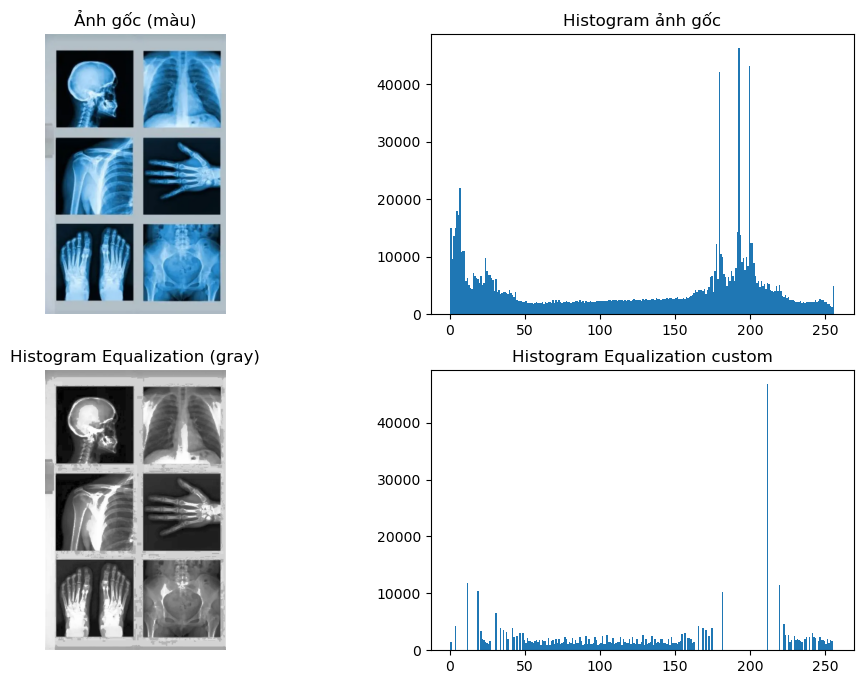

In [171]:
# Đọc ảnh màu
img2_3 = cv2.imread("D:\\IUH\\NAM_BA\\HK1\\XU_LY_ANH\\TieuLuan\\img\\anh-XQ-dau.webp")
img2_3_rgb = cv2.cvtColor(img2_3, cv2.COLOR_BGR2RGB)

# Chuyển sang ảnh xám để cân bằng histogram
img2_3_gray = cv2.cvtColor(img2_3, cv2.COLOR_BGR2GRAY)

def manual_hist_equalization(img):
    # Tính histogram
    hist, bins = np.histogram(img.flatten(), 256, [0,256])

    # PDF và CDF
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

    # Ánh xạ giá trị mới
    img_equalized = cdf_normalized[img]
    return img_equalized.astype(np.uint8)

# Thử nghiệm
manual_eq_img = manual_hist_equalization(img2_3_gray)

# Hiển thị kết quả
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title("Ảnh gốc (màu)")
plt.imshow(img2_3_rgb)
plt.axis("off")

plt.subplot(2,2,2)
plt.hist(img2_3_rgb.ravel(), 256, [0, 256])
plt.title("Histogram ảnh gốc")

plt.subplot(2,2,3)
plt.title("Histogram Equalization (gray)")
plt.imshow(manual_eq_img, cmap="gray")
plt.axis("off")

plt.subplot(2,2,4)
plt.hist(manual_eq_img.ravel(), 256, [0, 256])
plt.title("Histogram Equalization custom")

plt.show()

# so sánh 

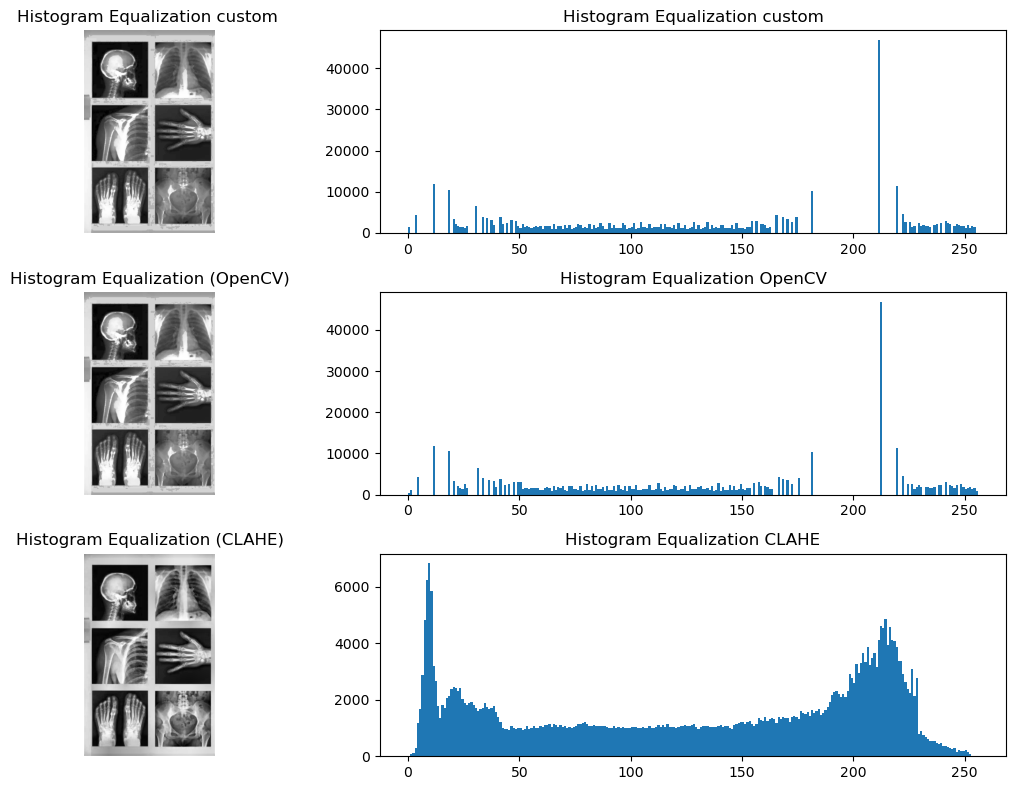

In [172]:
hist_custom = manual_hist_equalization(img2_3_gray) 
hist_fun = cv2.equalizeHist(img2_3_gray)

clahe_fun = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)) 
hist_clahe = clahe_fun.apply(img2_3_gray)

plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
plt.title("Histogram Equalization custom ")
plt.imshow(hist_custom, cmap="gray")
plt.axis("off")

plt.subplot(3,2,2)
plt.hist(hist_custom.ravel(), 256, [0, 256])
plt.title("Histogram Equalization custom")

plt.subplot(3,2,3)
plt.title("Histogram Equalization (OpenCV)")
plt.imshow(hist_fun, cmap="gray")
plt.axis("off")

plt.subplot(3,2,4)
plt.hist(hist_fun.ravel(), 256, [0, 256])
plt.title("Histogram Equalization OpenCV")

plt.subplot(3,2,5)
plt.title("Histogram Equalization (CLAHE)")
plt.imshow(hist_clahe, cmap="gray")
plt.axis("off")

plt.subplot(3,2,6)
plt.hist(hist_clahe.ravel(), 256, [0, 256])
plt.title("Histogram Equalization CLAHE")

plt.tight_layout()
plt.show()


## 3.Ứng dụng biến đổi ảnh cơ bản trong thực tế: tăng cường chất lượng ảnh

## 3.1 Tiền xử lý ảnh cho nhận dạng biển số xe

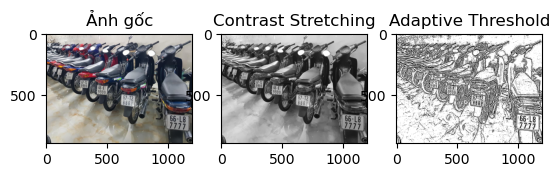

In [173]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh biển số
img3_1 = cv2.imread("D:\\IUH\\NAM_BA\\HK1\\XU_LY_ANH\\TieuLuan\\img\\xe.jpg")

img3_1_rgb = cv2.cvtColor(img3_1, cv2.COLOR_BGR2RGB)

# Chuyển xám
gray = cv2.cvtColor(img3_1, cv2.COLOR_BGR2GRAY)

# Contrast stretching
min_val = np.min(gray)
max_val = np.max(gray)
stretched = ((gray - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Adaptive Threshold
binary = cv2.adaptiveThreshold(stretched, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)

# Hiển thị
plt.subplot(1,3,1); plt.imshow(img3_1_rgb); plt.title("Ảnh gốc")
plt.subplot(1,3,2); plt.imshow(stretched, cmap='gray'); plt.title("Contrast Stretching")
plt.subplot(1,3,3); plt.imshow(binary, cmap='gray'); plt.title("Adaptive Threshold")
plt.show()



## 3.2 Cải thiện ảnh vệ tinh trong GIS

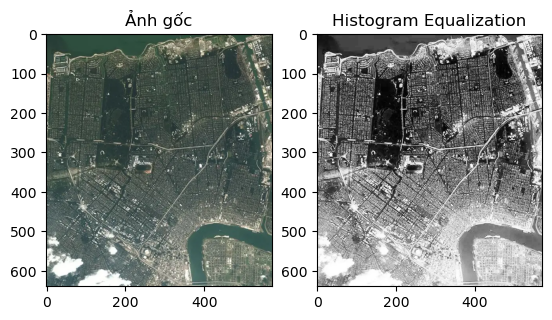

In [179]:
# Đọc ảnh vệ tinh
img3_2 = cv2.imread("D:\\IUH\\NAM_BA\\HK1\\XU_LY_ANH\\TieuLuan\\img\\anh-veTinh.jpg")

img3_2_rgb = cv2.cvtColor(img3_2, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img3_2, cv2.COLOR_BGR2GRAY)

# Histogram Equalization
equalized = cv2.equalizeHist(gray)

plt.subplot(1,2,1); plt.imshow(img3_2_rgb); plt.title("Ảnh gốc")
plt.subplot(1,2,2); plt.imshow(equalized, cmap='gray'); plt.title("Histogram Equalization")
plt.show()


## 3.3 Nâng cao chất lượng ảnh chụp trong điều kiện ánh sáng kém

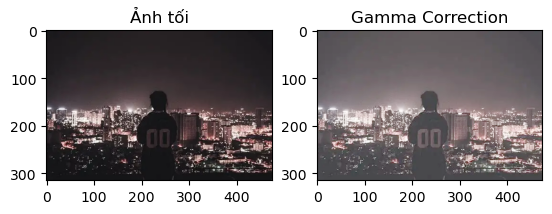

In [175]:
# Đọc ảnh chụp thiếu sáng
img3_3 = cv2.imread("D:\\IUH\\NAM_BA\\HK1\\XU_LY_ANH\\TieuLuan\\img\\OIP.jpg")

# Gamma correction (γ < 1 để làm sáng)
gamma = 0.5
gamma_corrected = np.array(255 * (img3_3 / 255) ** gamma, dtype='uint8')

plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img3_3, cv2.COLOR_BGR2RGB)); plt.title("Ảnh tối")
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)); plt.title("Gamma Correction")
plt.show()


## 3.4 Làm rõ giấy bị mờ / hóa đơn / sách cũ

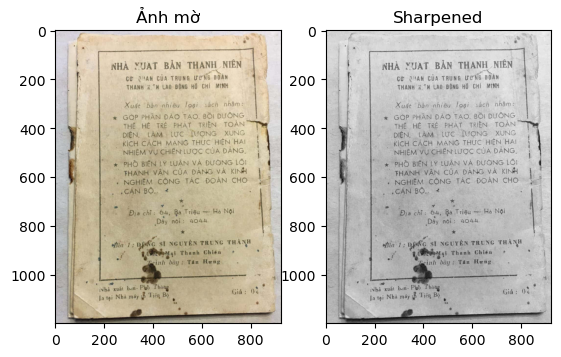

In [176]:
# Đọc ảnh hóa đơn
img3_4 = cv2.imread("D:\\IUH\\NAM_BA\\HK1\\XU_LY_ANH\\TieuLuan\\img\\sachCu.jpg")

img3_4_rgb = cv2.cvtColor(img3_4, cv2.COLOR_BGR2RGB)

img3_4_gray = cv2.cvtColor(img3_4, cv2.COLOR_BGR2GRAY)


# Làm mờ Gaussian
blur = cv2.GaussianBlur(img3_4_gray, (5,5), 0)

# Unsharp Masking
sharpened = cv2.addWeighted(img3_4_gray, 1.5, blur, -0.5, 0)

plt.subplot(1,2,1); plt.imshow(img3_4_rgb); plt.title("Ảnh mờ")
plt.subplot(1,2,2); plt.imshow(sharpened, cmap='gray'); plt.title("Sharpened")
plt.show()
